# SUMMER ANALYTICS 2023

## WEEK-4 ASSIGNMENT

In [1]:

import matplotlib.pyplot as plt  # data visualization
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Let's explore the dataset shall we?**

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maintenance cost, doors, persons, lug_boot, safety.
In this notebook we will go through an in depth analysis of sound and how we can classify and ultimately understand it.

I suggest you to use the internet before asking a doubt. Most of your doubts will disappear once you read the documentation or search StackOverflow!

Note: Pay close attention to the markdown cells and the comments.

In [2]:
# Read the csv file as data
df=pd.read_csv('car_evaluation.csv')

# you may print first few rows
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Attribute Information->

Class Values: unacc, acc, good, vgood

Attributes->
buying- vhigh, high, med, low.
maint- vhigh, high, med, low.
doors -2, 3, 4, 5more.
persons-2, 4, more.
lug_boot- small, med, big.
safety- low, med, high.

In [3]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [4]:
# view dimensions of dataset
df.shape

(1727, 7)

We can see that there are 1727 instances and 7 variables in the data set.


**Rename column names**
We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

Frequency distribution of values in variables
Now, I will check the frequency counts of categorical variable

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.
These are given by buying, maint, doors, persons, lug_boot, safety and class.
class is the target variable.

In [7]:
# check missing values in variables
#write your code here
df.isna().sum()

buying 0
maint 0
doors 0
persons 0
lug_boot 0
safety 0
class 0
dtype: int64

**Declare feature vector and target variable**

In [8]:
X = df.drop(['class'], axis=1)

y = df['class']

**Split data into separate training and test set**

In [9]:
#  split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (570, 6))

Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [11]:
# check data types in X_train
X_train.dtypes

buying object
maint object
doors object
persons object
lug_boot object
safety object
dtype: object

Encode categorical variables
Now, I will encode the categorical variables.

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


We can see that all the variables are ordinal categorical data type.


In [13]:
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [14]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


Now let's perform Machine Learning Classification. We'll be predicting the genre based on the given features.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

Creating a Predefined function to assess the accuracy of a model. This will be the scoring function

In [16]:
def score(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

 Let's see how a basic Logistic Regressor works on this!

In [17]:
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
score(lg, "Logistic Regression")

[[ 26   0  98   3]
 [  2   0  16   0]
 [ 26   0 371   2]
 [ 14   0  11   1]]
Accuracy for Logistic Regression : 0.69825 



**Now it's your turn. Train the following:**

In [18]:
# AdaBoostClassifier
#YOUR CODE HERE
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
score(clf, "AdaBoost Classifier")

[[ 51   4  69   3]
 [  4   8   0   6]
 [ 29  12 358   0]
 [  0   0   0  26]]
Accuracy for AdaBoost Classifier : 0.77719 



4. **AdaBoostClassifier** with n_estimators=1000 & random_state=0
5. **RandomForestClassifier** with n_estimators=1000, max_depth=10, random_state=0

**IMPORTANT**: Use the default values for other hyper parameters apart from these. Do **NOT** change these values

In [19]:
# Random Forest
#YOUR CODE HERE
rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
score(rfc, "Random Forest Classifier")

[[114   2   9   2]
 [  6   8   0   4]
 [  1   0 398   0]
 [  2   0   0  24]]
Accuracy for Random Forest Classifier : 0.95439 



AdaBoost performs poorly, but Random Forest looks great!

Now look at the import statements. There may be a few models you may or may not have seen. Use those models to beat the score you achieved in the cell above! Play around with their hyper parameters.
We suggest going through their documentations before using them.

In [20]:
# Naive Bayes: GaussianNB
#YOUR CODE HERE
gnb= GaussianNB()
score(gnb, "Gaussian NB")

# KNN: KNeighborsClassifier
#YOUR CODE HERE
neigh = KNeighborsClassifier()
score(neigh, "KNeighbors Classifier")

# Decission trees: DecisionTreeClassifier
#YOUR CODE HERE
dtc = DecisionTreeClassifier(random_state=0)
score(dtc, "Decision Tree Classifier")

[[  5   1  56  65]
 [  2   0   5  11]
 [  2   0 319  78]
 [  0   0   0  26]]
Accuracy for Gaussian NB : 0.61404 

[[ 92   1  33   1]
 [ 13   3   2   0]
 [  2   0 397   0]
 [  5   0   2  19]]
Accuracy for KNeighbors Classifier : 0.89649 

[[119   3   3   2]
 [  3  14   0   1]
 [  0   0 399   0]
 [  0   2   0  24]]
Accuracy for Decision Tree Classifier : 0.97544 



Visualize decision-trees

[Text(0.5413851351351351, 0.9642857142857143, 'x[3] <= 0.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.5278716216216216, 0.8928571428571429, 'gini = 0.0\nsamples = 377\nvalue = [0, 0, 377, 0]'),
 Text(0.5548986486486487, 0.8928571428571429, 'x[5] <= 0.5\ngini = 0.576\nsamples = 780\nvalue = [257, 51, 433, 39]'),
 Text(0.27407094594594594, 0.8214285714285714, 'x[0] <= 2.5\ngini = 0.626\nsamples = 256\nvalue = [138, 19, 60, 39]'),
 Text(0.15625, 0.75, 'x[0] <= 0.5\ngini = 0.615\nsamples = 189\nvalue = [106, 19, 25, 39]'),
 Text(0.05405405405405406, 0.6785714285714286, 'x[1] <= 2.5\ngini = 0.404\nsamples = 64\nvalue = [46, 0, 18, 0]'),
 Text(0.04054054054054054, 0.6071428571428571, 'x[2] <= 0.5\ngini = 0.115\nsamples = 49\nvalue = [46, 0, 3, 0]'),
 Text(0.02702702702702703, 0.5357142857142857, 'x[4] <= 1.5\ngini = 0.32\nsamples = 15\nvalue = [12, 0, 3, 0]'),
 Text(0.013513513513513514, 0.4642857142857143, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(0.0

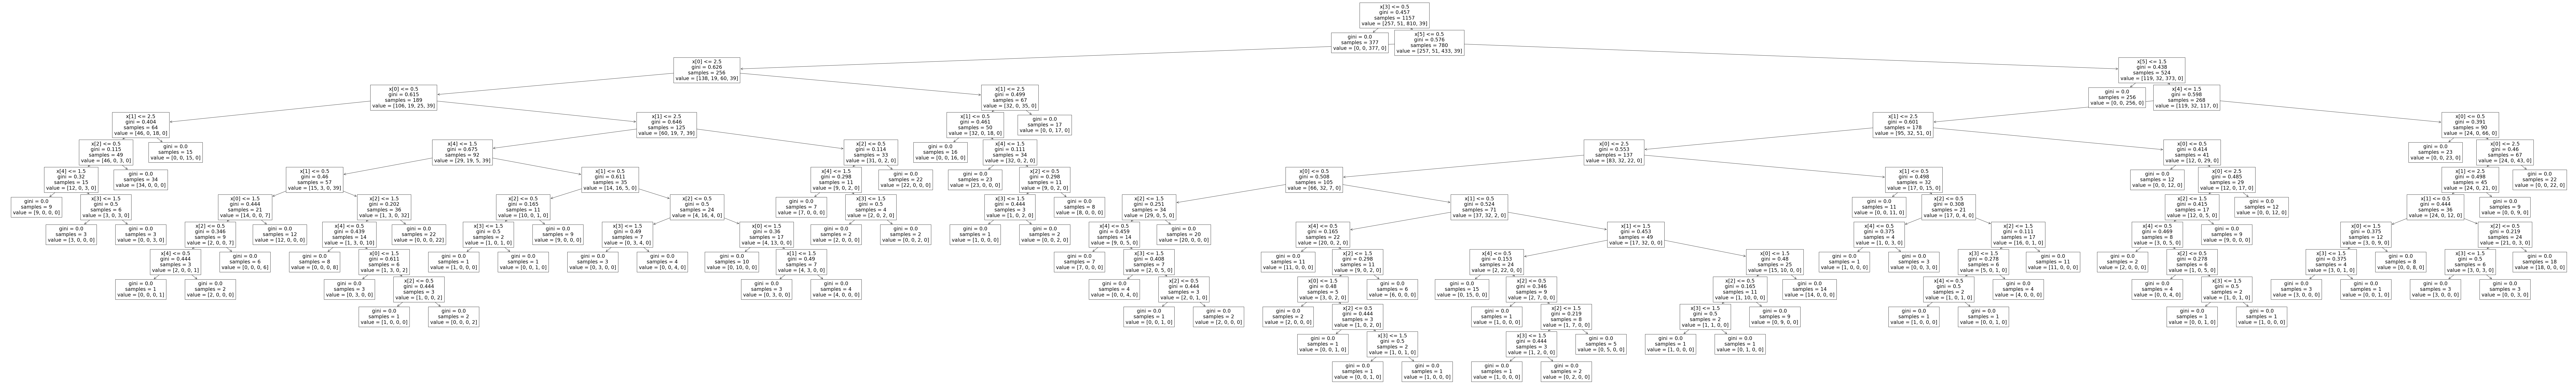

In [21]:
plt.figure(figsize=(200,30))

from sklearn import tree
#change the model name
tree.plot_tree(dtc)

Decision Tree Classifier with criterion gini index,max_depth=10, random_state=0

In [22]:
#YOUR CODE HERE
dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
score(dtc, "Decision Tree Classifier")

[[114   7   3   3]
 [  0  15   0   3]
 [  5   0 394   0]
 [  0   2   0  24]]
Accuracy for Decision Tree Classifier : 0.95965 



Decision Tree Classifier with criterion entripy index,max_depth=8, random_state=0

In [23]:
#YOUR CODE HERE
dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
score(dtc2, "Decision Tree Classifier")

[[ 98  12  14   3]
 [  0  12   0   6]
 [  7   0 392   0]
 [  0   0   0  26]]
Accuracy for Decision Tree Classifier : 0.92632 



Use XGBClassifier with n_estimators=1000 and learning_rate=0.01

In [24]:
# XGBClassifier
#YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

xgbc = XGBClassifier(n_estimators=1000, learning_rate=0.01)
score(xgbc, "XGB Classifier")

[[121   4   1   1]
 [  2  13   0   3]
 [  0   0 399   0]
 [  1   0   0  25]]
Accuracy for XGB Classifier : 0.97895 



Visualize XGBClassifier

ExecutableNotFound: ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

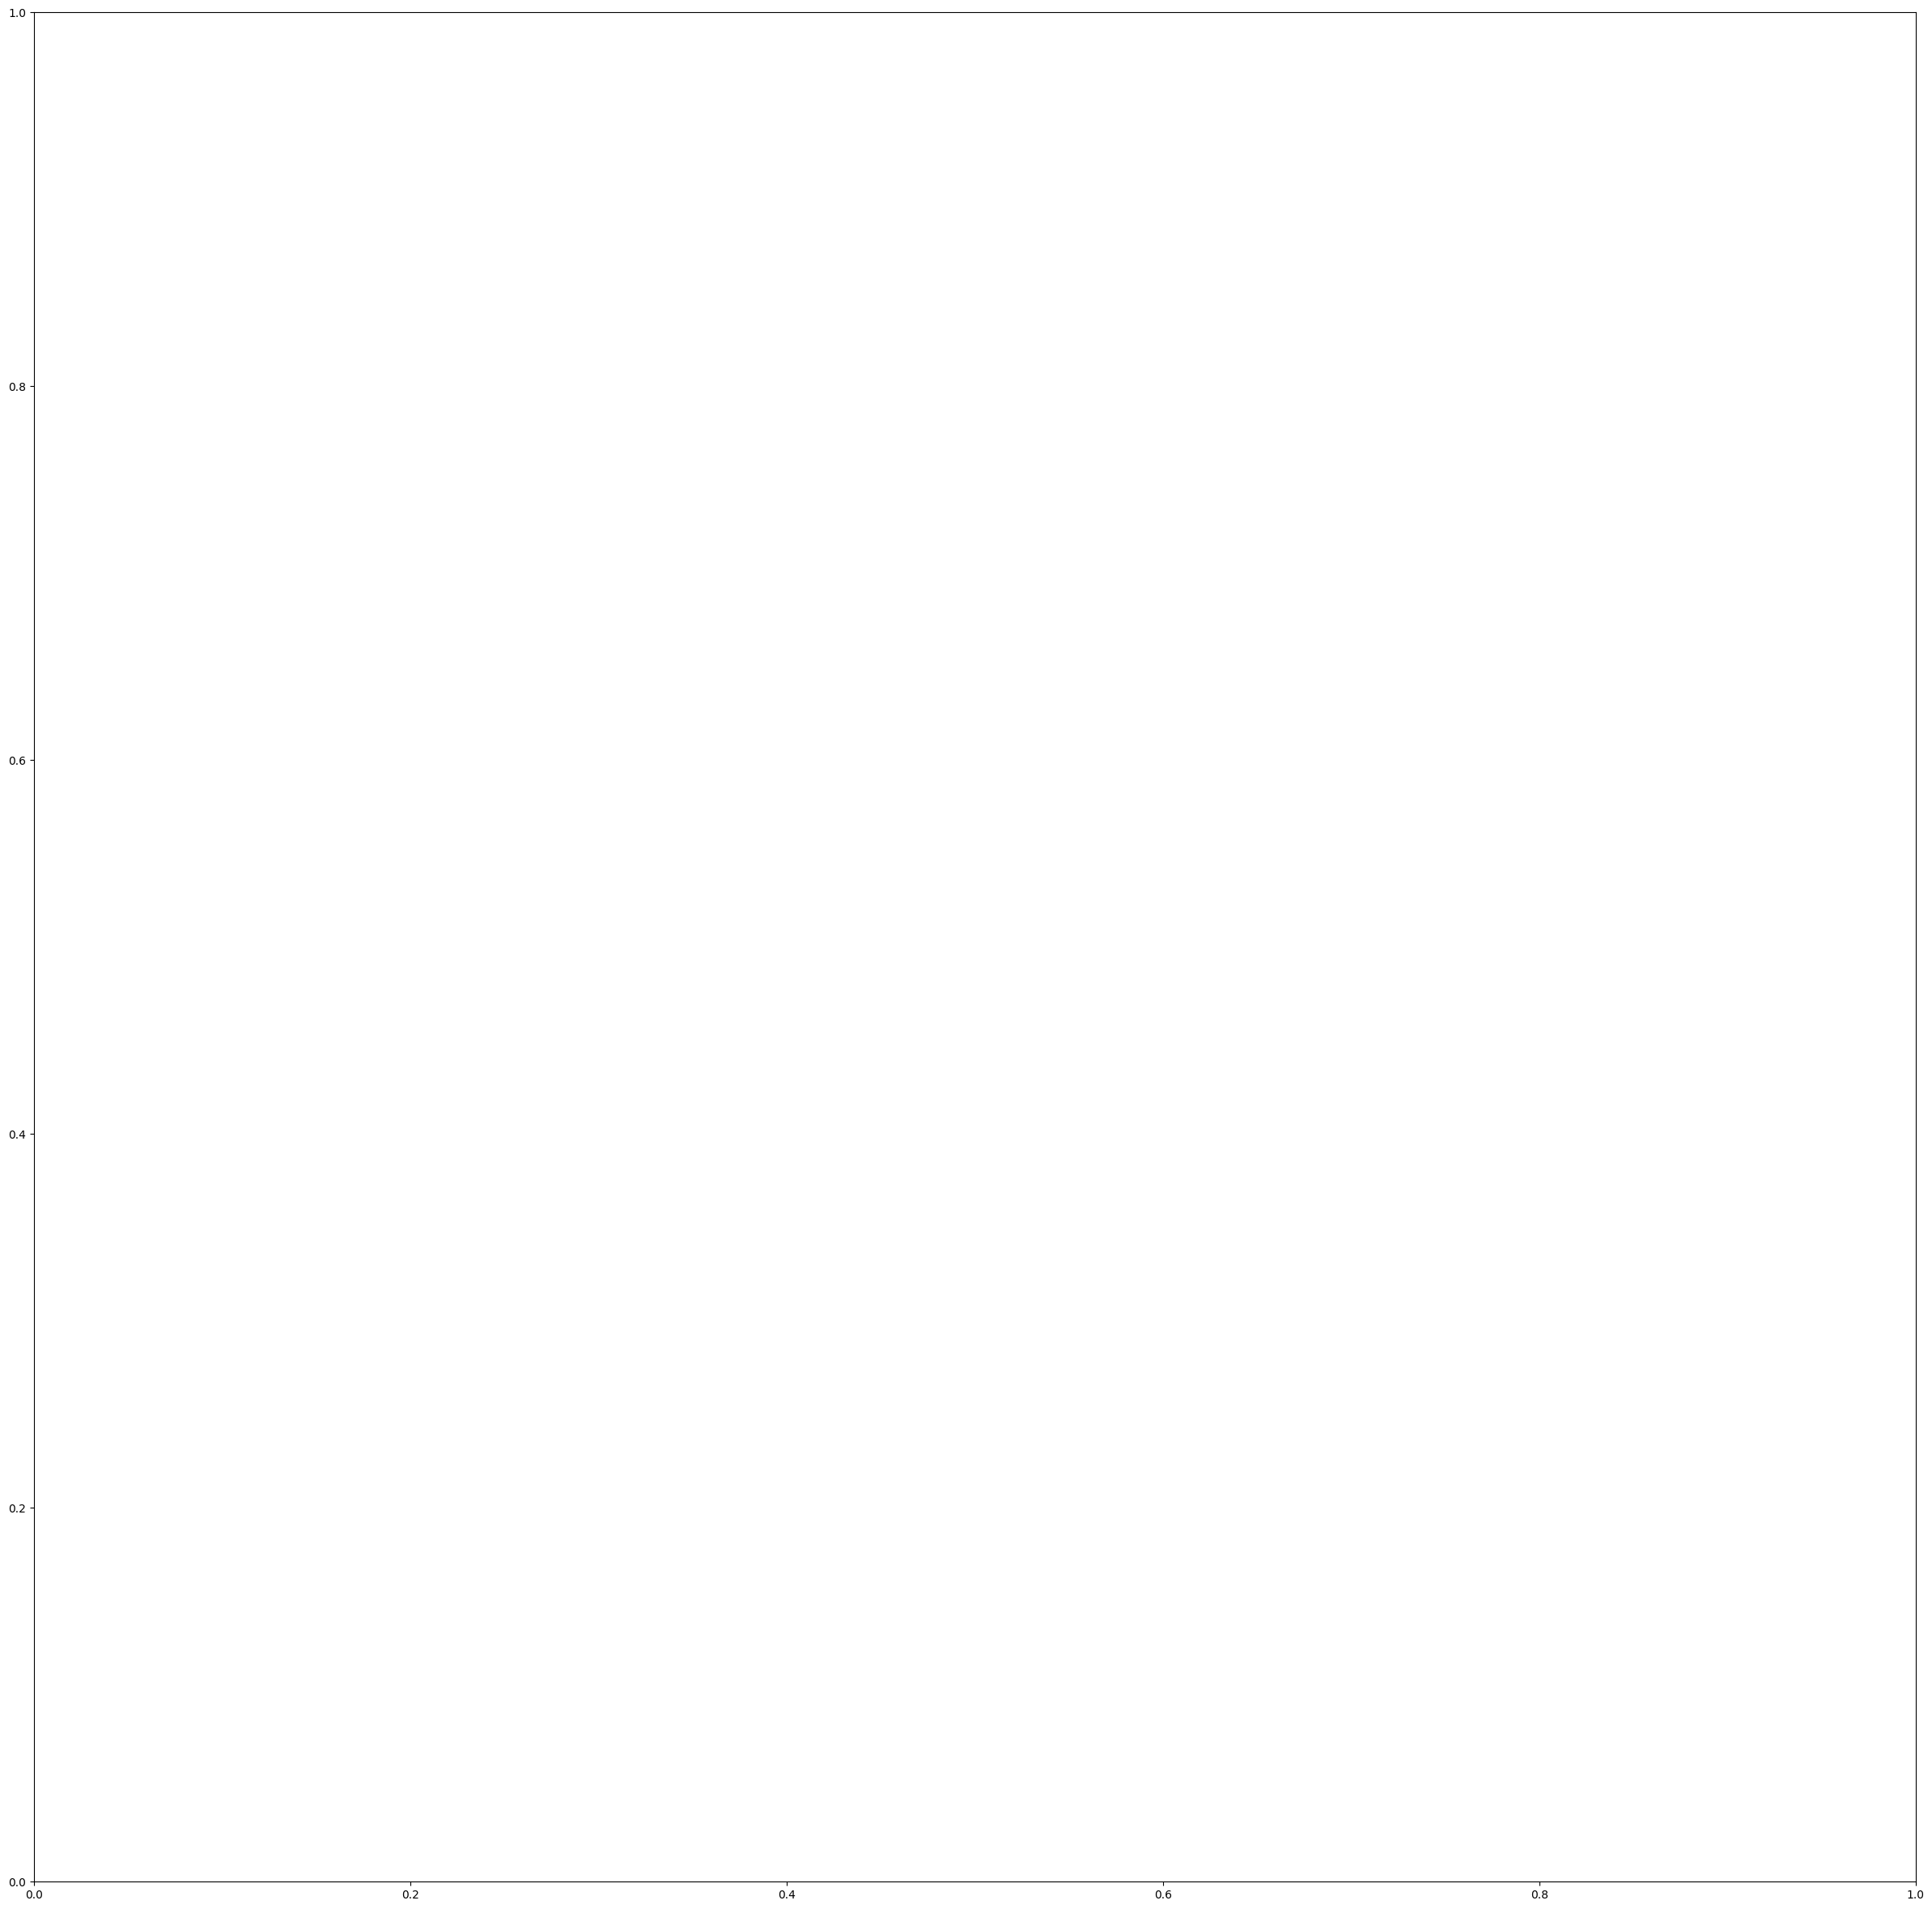

In [31]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(30, 30))
#change the model name
plot_tree(xgbc, ax=ax)
plt.show()

Now, heres a task for you. Try XGBRFClassifier on your own.

In [33]:
# XGBRFClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

XGBRFC = XGBRFClassifier()
score(XGBRFC, "XGBRF Classifier")

[[100   0  23   4]
 [  8   4   0   6]
 [  8   0 391   0]
 [  0   0   0  26]]
Accuracy for XGBRF Classifier : 0.91404 



Plot the Confusion Matrix for XGBClassifier with parameters n_estimators=1000, learning_rate=0.1

In [32]:
# Cell to plot Confusion Matrix
#YOUR CODE HERE
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

# Create and fit the model
xgbc = XGBClassifier(n_estimators=1000, learning_rate=0.1)
xgbc.fit(X_train, y_train)

# Plot the confusion matrix
plot_confusion_matrix(xgbc, X_test, y_test)
plt.show()

ImportError: ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/opt/python/envs/default/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

8. Find the feature importance for XGBClassifier.

*Hint: It's an inbuilt member variable*

In [26]:
# Cell to find Feature Importance
#YOUR CODE HERE
# Get the feature importance scores
importances = xgbc.feature_importances_

# Print the importance scores for each feature
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

buying: 0.12472090125083923
maint: 0.14183707535266876
doors: 0.04213864728808403
persons: 0.2828669548034668
lug_boot: 0.08277320116758347
safety: 0.32566317915916443


**Classification Report**
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification for XGBClassifierwith parameters n_estimators=1000, learning_rate=0.1

In [27]:
#YOUR CODE HERE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create and fit the model
xgbc = XGBClassifier(n_estimators=1000, learning_rate=0.1)
xgbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgbc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       127
           1       0.81      0.72      0.76        18
           2       1.00      1.00      1.00       399
           3       0.83      0.96      0.89        26

    accuracy                           0.98       570
   macro avg       0.91      0.91      0.91       570
weighted avg       0.98      0.98      0.98       570

